In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

učitavanje podataka

In [3]:
train_df = pd.read_csv('train_timeseries.csv')
train_df.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


vrijednost score se unosi svakih 7 dana, no ostali podaci dataseta se unose za svaki dan, stoga za stupac score imamo puno NaN vrijednosti koje treba ukloniti

In [4]:
train_df.isnull().sum()

fips                  0
date                  0
PRECTOT               0
PS                    0
QV2M                  0
T2M                   0
T2MDEW                0
T2MWET                0
T2M_MAX               0
T2M_MIN               0
T2M_RANGE             0
TS                    0
WS10M                 0
WS10M_MAX             0
WS10M_MIN             0
WS10M_RANGE           0
WS50M                 0
WS50M_MAX             0
WS50M_MIN             0
WS50M_RANGE           0
score          16543884
dtype: int64

In [5]:
train_df = train_df.dropna()
train_df.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2756796 entries, 3 to 19300675
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 462.7+ MB


dodaju se year, month i date, te se score pretvara u tip podataka int32

In [7]:
train_df['year'] = pd.DatetimeIndex(train_df['date']).year
train_df['month'] = pd.DatetimeIndex(train_df['date']).month
train_df['day'] = pd.DatetimeIndex(train_df['date']).day
train_df['score'] = train_df['score'].round().astype(int)
train_df.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score            int32
year             int32
month            int32
day              int32
dtype: object

Analiza podataka

In [8]:
train_df.describe()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
count,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,...,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06
mean,3.067038e+04,2.714566e+00,9.664736e+01,7.875770e+00,1.289923e+01,7.049350e+00,7.084938e+00,1.876711e+01,7.519916e+00,1.124720e+01,...,1.920655e+00,3.282268e+00,5.532799e+00,7.828799e+00,3.121578e+00,4.707223e+00,8.231266e-01,2.007999e+03,6.520857e+00,1.568997e+01
std,1.497911e+04,6.247590e+00,5.444698e+00,4.721459e+00,1.097040e+01,1.019765e+01,1.014364e+01,1.160295e+01,1.061818e+01,4.038022e+00,...,1.342458e+00,1.943136e+00,2.298550e+00,2.836618e+00,2.109945e+00,2.181020e+00,1.239070e+00,4.897714e+00,3.447033e+00,8.798878e+00
min,1.001000e+03,0.000000e+00,6.649000e+01,1.400000e-01,-3.544000e+01,-3.544000e+01,-3.546000e+01,-3.003000e+01,-4.085000e+01,1.600000e-01,...,0.000000e+00,2.600000e-01,5.100000e-01,8.500000e-01,0.000000e+00,4.200000e-01,0.000000e+00,2.000000e+03,1.000000e+00,1.000000e+00
25%,1.904450e+04,0.000000e+00,9.583000e+01,3.810000e+00,4.580000e+00,-8.800000e-01,-8.400000e-01,1.036000e+01,-5.700000e-01,8.370000e+00,...,9.600000e-01,1.820000e+00,3.820000e+00,5.700000e+00,1.450000e+00,3.140000e+00,0.000000e+00,2.004000e+03,4.000000e+00,8.000000e+00
50%,2.921200e+04,1.900000e-01,9.828000e+01,6.940000e+00,1.421000e+01,7.810000e+00,7.810000e+00,2.062000e+01,8.260000e+00,1.120000e+01,...,1.660000e+00,2.820000e+00,5.150000e+00,7.350000e+00,2.770000e+00,4.270000e+00,0.000000e+00,2.008000e+03,7.000000e+00,1.600000e+01
75%,4.600750e+04,2.260000e+00,9.994000e+01,1.145000e+01,2.200000e+01,1.567000e+01,1.567000e+01,2.797000e+01,1.628000e+01,1.408000e+01,...,2.570000e+00,4.280000e+00,6.880000e+00,9.490000e+00,4.390000e+00,5.810000e+00,1.000000e+00,2.012000e+03,1.000000e+01,2.300000e+01
max,5.604300e+04,1.686900e+02,1.037600e+02,2.212000e+01,3.933000e+01,2.687000e+01,2.687000e+01,4.775000e+01,3.228000e+01,3.017000e+01,...,1.462000e+01,1.872000e+01,2.247000e+01,2.833000e+01,1.778000e+01,2.337000e+01,5.000000e+00,2.016000e+03,1.200000e+01,3.100000e+01


In [9]:
train_df.columns

Index(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score', 'year', 'month', 'day'],
      dtype='object')

In [10]:
mjere = train_df[['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN',
                                  'WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']]
mjere

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
3,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58
10,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,10.43,1.76,2.48,1.05,1.43,3.55,6.38,1.71,4.67
17,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,9.06,14.19,2.63,3.60,1.67,1.92,5.19,6.40,3.84,2.55
24,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,11.11,-0.61,3.35,4.59,2.28,2.32,5.75,8.03,3.96,4.07
31,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,15.23,1.88,2.03,2.74,0.88,1.86,4.18,6.38,1.27,5.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19300647,0.04,82.47,2.19,-4.27,-9.36,-9.26,-1.51,-7.22,5.71,-4.38,6.93,10.27,3.08,7.18,9.42,12.59,5.62,6.97
19300654,0.13,82.59,0.91,-11.96,-18.65,-17.90,-6.85,-15.24,8.39,-11.98,2.27,3.97,0.95,3.02,3.07,5.16,0.83,4.33
19300661,0.02,82.86,1.40,-9.56,-14.18,-13.95,-2.69,-13.01,10.32,-10.95,3.64,6.59,1.28,5.31,5.33,8.35,2.13,6.22
19300668,0.32,83.12,2.73,-2.55,-6.90,-6.84,2.66,-7.77,10.42,-3.94,6.16,8.43,3.44,4.99,8.99,10.14,6.67,3.47


prikaz stršila u distribuciji mjerila

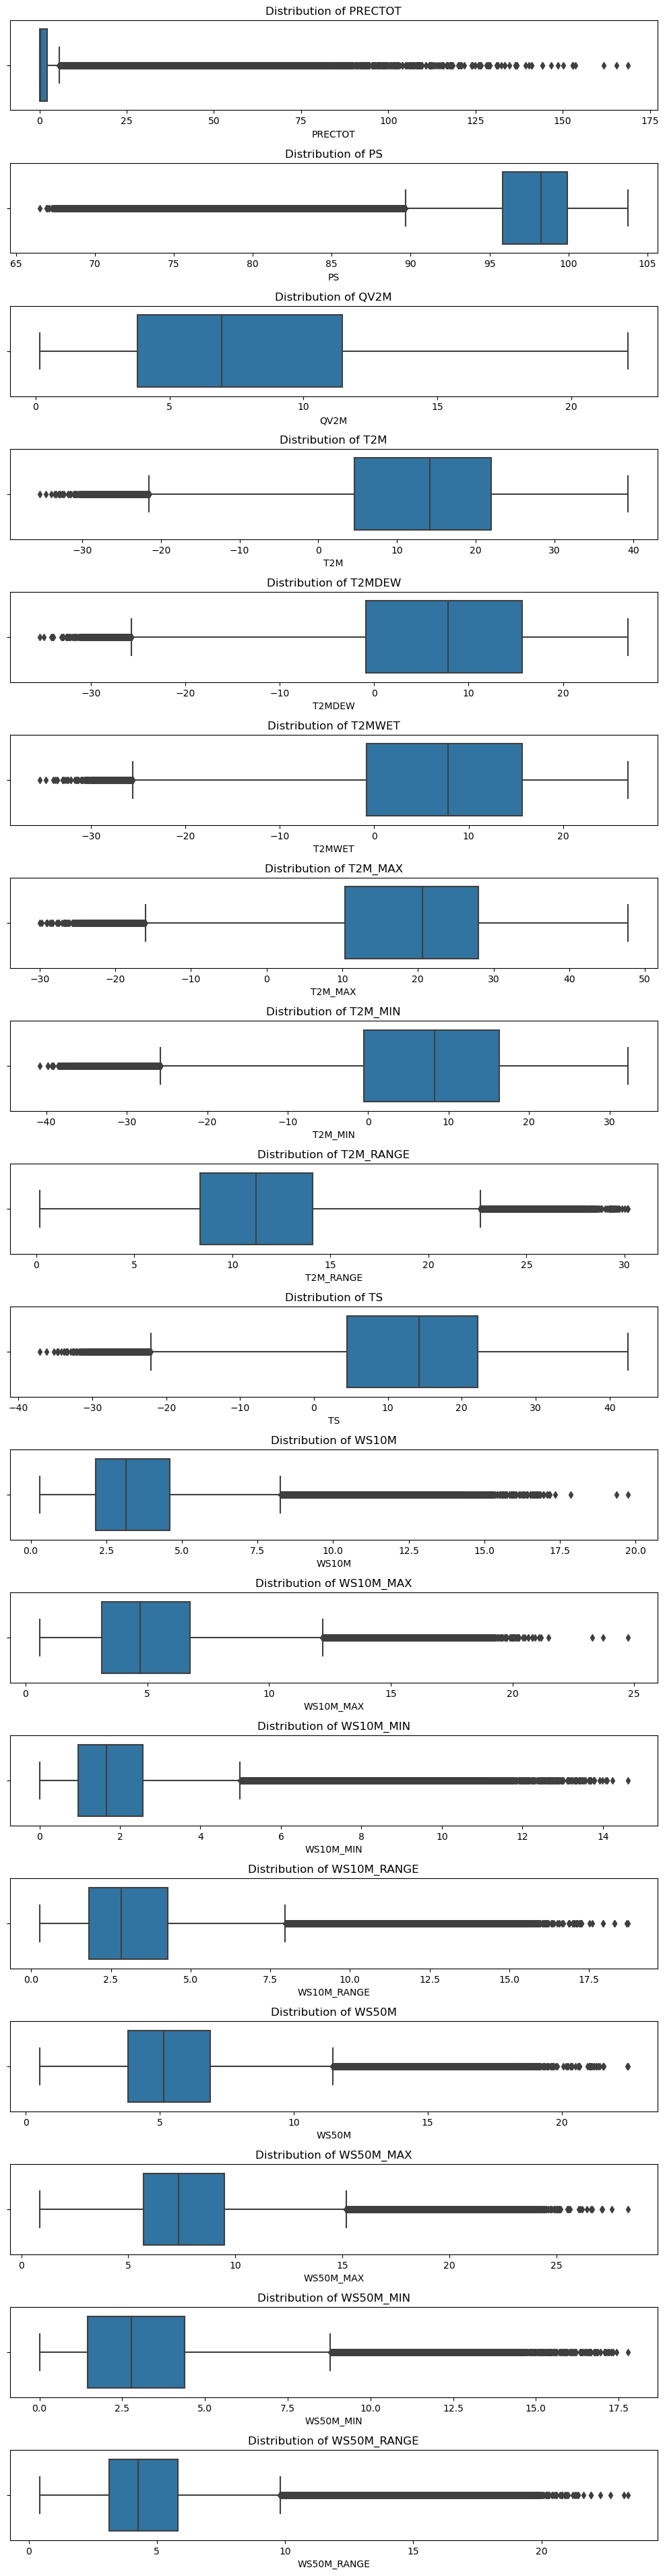

In [11]:
plt.figure(figsize=(10,40))
for x in (range(1,19)):
    plt.subplot(19,1,x)
    sns.boxplot(x=mjere.columns[x-1], data=mjere)
    naziv = mjere.columns[x-1]
    plt.title(f'Distribution of {naziv}')         
plt.tight_layout()

uklanjanje vrijednosti izvan standardne distribucije

In [12]:
train_df = train_df[(train_df['PRECTOT'] <= train_df['PRECTOT'].mean() + 3*train_df['PRECTOT'].std()) &
                    (train_df['PRECTOT'] >= train_df['PRECTOT'].mean() - 3*train_df['PRECTOT'].std())]
train_df = train_df[(train_df['PS'] <= train_df['PS'].mean() + 3*train_df['PS'].std()) &
                    (train_df['PS'] >= train_df['PS'].mean() - 3*train_df['PS'].std())]
train_df = train_df[(train_df['QV2M'] <= train_df['QV2M'].mean() + 3*train_df['QV2M'].std()) &
                    (train_df['QV2M'] >= train_df['QV2M'].mean() - 3*train_df['QV2M'].std())]
train_df = train_df[(train_df['T2M'] <= train_df['T2M'].mean() + 3*train_df['T2M'].std()) &
                    (train_df['T2M'] >= train_df['T2M'].mean() - 3*train_df['T2M'].std())]
train_df = train_df[(train_df['T2MDEW'] <= train_df['T2MDEW'].mean() + 3*train_df['T2MDEW'].std()) &
                    (train_df['T2MDEW'] >= train_df['T2MDEW'].mean() - 3*train_df['T2MDEW'].std())]
train_df = train_df[(train_df['T2MWET'] <= train_df['T2MWET'].mean() + 3*train_df['T2MWET'].std()) &
                    (train_df['T2MWET'] >= train_df['T2MWET'].mean() - 3*train_df['T2MWET'].std())]
train_df = train_df[(train_df['T2M_MAX'] <= train_df['T2M_MAX'].mean() + 3*train_df['T2M_MAX'].std()) &
                    (train_df['T2M_MAX'] >= train_df['T2M_MAX'].mean() - 3*train_df['T2M_MAX'].std())]
train_df = train_df[(train_df['T2M_MIN'] <= train_df['T2M_MIN'].mean() + 3*train_df['T2M_MIN'].std()) &
                    (train_df['T2M_MIN'] >= train_df['T2M_MIN'].mean() - 3*train_df['T2M_MIN'].std())]
train_df = train_df[(train_df['T2M_RANGE'] <= train_df['T2M_RANGE'].mean() + 3*train_df['T2M_RANGE'].std()) &
                    (train_df['T2M_RANGE'] >= train_df['T2M_RANGE'].mean() - 3*train_df['T2M_RANGE'].std())]
train_df = train_df[(train_df['TS'] <= train_df['TS'].mean() + 3*train_df['TS'].std()) &
                    (train_df['TS'] >= train_df['TS'].mean() - 3*train_df['TS'].std())]
train_df = train_df[(train_df['WS10M'] <= train_df['WS10M'].mean() + 3*train_df['WS10M'].std()) &
                    (train_df['WS10M'] >= train_df['WS10M'].mean() - 3*train_df['WS10M'].std())]
train_df = train_df[(train_df['WS10M_MAX'] <= train_df['WS10M_MAX'].mean() + 3*train_df['WS10M_MAX'].std()) &
                    (train_df['WS10M_MAX'] >= train_df['WS10M_MAX'].mean() - 3*train_df['WS10M_MAX'].std())]
train_df = train_df[(train_df['WS10M_MIN'] <= train_df['WS10M_MIN'].mean() + 3*train_df['WS10M_MIN'].std()) &
                    (train_df['WS10M_MIN'] >= train_df['WS10M_MIN'].mean() - 3*train_df['WS10M_MIN'].std())]
train_df = train_df[(train_df['WS10M_RANGE'] <= train_df['WS10M_RANGE'].mean() + 3*train_df['WS10M_RANGE'].std()) &
                    (train_df['WS10M_RANGE'] >= train_df['WS10M_RANGE'].mean() - 3*train_df['WS10M_RANGE'].std())]
train_df = train_df[(train_df['WS50M'] <= train_df['WS50M'].mean() + 3*train_df['WS50M'].std()) &
                    (train_df['WS50M'] >= train_df['WS50M'].mean() - 3*train_df['WS50M'].std())]
train_df = train_df[(train_df['WS50M_MAX'] <= train_df['WS50M_MAX'].mean() + 3*train_df['WS50M_MAX'].std()) &
                    (train_df['WS50M_MAX'] >= train_df['WS50M_MAX'].mean() - 3*train_df['WS50M_MAX'].std())]
train_df = train_df[(train_df['WS50M_RANGE'] <= train_df['WS50M_RANGE'].mean() + 3*train_df['WS50M_RANGE'].std()) &
                    (train_df['WS50M_RANGE'] >= train_df['WS50M_RANGE'].mean() - 3*train_df['WS50M_RANGE'].std())]

<Axes: >

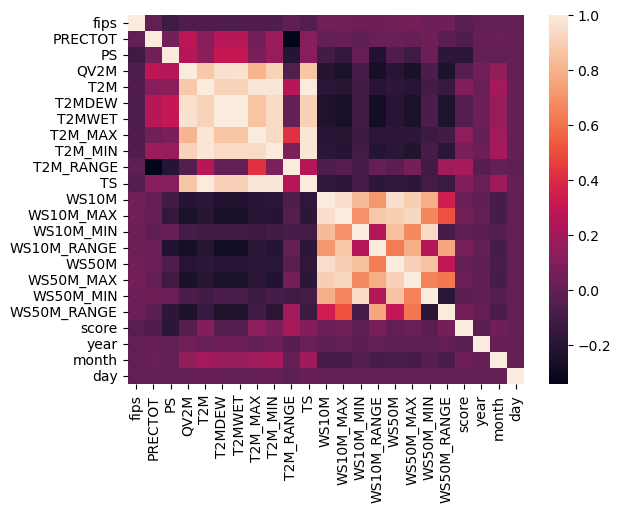

In [13]:
sns.heatmap(train_df.corr(numeric_only=True))

In [14]:
train_df.corr(numeric_only=True)

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
fips,1.000000,-0.006173,-0.119962,-0.067765,-0.062080,-0.067701,-0.067908,-0.061281,-0.062833,-0.011885,...,0.033393,0.032958,0.051295,0.056135,0.034854,0.036367,-0.035624,-0.000688,0.000580,0.000185
PRECTOT,-0.006173,1.000000,0.051683,0.284651,0.117080,0.262675,0.262601,0.044015,0.177973,-0.343783,...,-0.010413,0.020303,0.013556,0.005701,0.032217,-0.025721,-0.060797,0.009181,0.016389,0.003161
PS,-0.119962,0.051683,1.000000,0.258873,0.121310,0.302264,0.302125,0.074671,0.161775,-0.211513,...,0.011470,-0.228167,-0.061512,-0.120484,0.028408,-0.183919,-0.182224,-0.006725,-0.002704,-0.005650
QV2M,-0.067765,0.284651,0.258873,1.000000,0.875078,0.962857,0.963817,0.810050,0.911811,-0.058354,...,-0.101959,-0.263063,-0.201068,-0.250744,-0.077081,-0.243060,-0.040760,0.046172,0.150626,0.000937
T2M,-0.062080,0.117080,0.121310,0.875078,1.000000,0.915005,0.915674,0.983862,0.982233,0.261236,...,-0.113696,-0.198062,-0.185068,-0.198465,-0.107250,-0.144953,0.098108,0.015635,0.196939,0.008405
T2MDEW,-0.067701,0.262675,0.302264,0.962857,0.915005,1.000000,0.999975,0.858290,0.940827,0.005227,...,-0.107453,-0.276137,-0.198131,-0.245059,-0.077068,-0.235770,-0.045483,0.035829,0.169578,0.007191
T2MWET,-0.067908,0.262601,0.302125,0.963817,0.915674,0.999975,1.000000,0.858958,0.941505,0.005375,...,-0.107509,-0.275792,-0.198220,-0.245085,-0.077226,-0.235641,-0.044781,0.035963,0.169563,0.007133
T2M_MAX,-0.061281,0.044015,0.074671,0.810050,0.983862,0.858290,0.858958,1.000000,0.939699,0.421056,...,-0.125757,-0.189712,-0.182856,-0.182207,-0.124767,-0.106100,0.134633,0.006552,0.194046,0.004903
T2M_MIN,-0.062833,0.177973,0.161775,0.911811,0.982233,0.940827,0.941505,0.939699,1.000000,0.085458,...,-0.104429,-0.211466,-0.192013,-0.221464,-0.092796,-0.189325,0.068605,0.023938,0.210570,0.010357
T2M_RANGE,-0.011885,-0.343783,-0.211513,-0.058354,0.261236,0.005227,0.005375,0.421056,0.085458,1.000000,...,-0.089406,0.008157,-0.023462,0.056535,-0.117371,0.193019,0.210273,-0.044397,0.006849,-0.013182


In [15]:
independent_v = train_df.drop(['score', 'fips', 'date'], axis=1)
independent_v.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,year,month,day
3,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,...,5.67,2.08,3.59,6.73,9.31,3.74,5.58,2000,1,4
10,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,10.43,...,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2000,1,11
17,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,9.06,14.19,...,3.60,1.67,1.92,5.19,6.40,3.84,2.55,2000,1,18
24,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,11.11,-0.61,...,4.59,2.28,2.32,5.75,8.03,3.96,4.07,2000,1,25
31,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,15.23,1.88,...,2.74,0.88,1.86,4.18,6.38,1.27,5.11,2000,2,1


In [16]:
target = train_df['score']
target.head()

3     1
10    2
17    2
24    2
31    1
Name: score, dtype: int32

# Razvoj modela stabla odlučivanja

In [18]:
x_train, x_test, y_train, y_test = train_test_split(independent_v, target, test_size=0.2, random_state=0)

In [19]:
print('X_train shape', x_train.shape)
print('Y_train shape', y_train.shape)
print('X_test shape', x_test.shape)
print('Y_test shape', y_test.shape)

X_train shape (1982292, 21)
Y_train shape (1982292,)
X_test shape (495573, 21)
Y_test shape (495573,)


In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(x_train, y_train)
y_predict = decision_tree.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('Performanse algoritma')
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
print('Accuracy:',accuracy_score(y_test, y_predict))
print('Precision:',precision_score(y_test, y_predict, average='weighted'))

Performanse algoritma
[[272181  19024   4892   2063    888    257]
 [ 20883  50134   9384   2031    673    198]
 [  4999  10574  29190   6149   1162    248]
 [  2187   2215   7096  19465   3550    440]
 [   803    683   1254   4000  10473   1340]
 [   289    203    268    432   1560   4385]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91    299305
           1       0.61      0.60      0.60     83303
           2       0.56      0.56      0.56     52322
           3       0.57      0.56      0.56     34953
           4       0.57      0.56      0.57     18553
           5       0.64      0.61      0.63      7137

    accuracy                           0.78    495573
   macro avg       0.64      0.63      0.64    495573
weighted avg       0.78      0.78      0.78    495573

Accuracy: 0.7785492752833588
Precision: 0.7772468684606251


## Normalizacija podataka

In [23]:
x_train_min = x_train.min()
x_train_min

PRECTOT           0.00
PS               80.14
QV2M              0.50
T2M             -19.75
T2MDEW          -22.89
T2MWET          -21.86
T2M_MAX         -15.63
T2M_MIN         -23.70
T2M_RANGE         0.16
TS              -19.83
WS10M             0.36
WS10M_MAX         0.59
WS10M_MIN         0.00
WS10M_RANGE       0.27
WS50M             0.51
WS50M_MAX         0.85
WS50M_MIN         0.00
WS50M_RANGE       0.42
year           2000.00
month             1.00
day               1.00
dtype: float64

In [24]:
x_train_max = x_train.max()
x_train_max

PRECTOT          21.45
PS              103.76
QV2M             21.95
T2M              38.93
T2MDEW           26.54
T2MWET           26.54
T2M_MAX          47.75
T2M_MIN          32.28
T2M_RANGE        23.25
TS               42.48
WS10M             9.08
WS10M_MAX        12.49
WS10M_MIN         5.58
WS10M_RANGE       8.63
WS50M            11.40
WS50M_MAX        14.82
WS50M_MIN        10.51
WS50M_RANGE      10.28
year           2016.00
month            12.00
day              31.00
dtype: float64

In [25]:
x_train_range = (x_train_max - x_train_min)
x_train_range

PRECTOT        21.45
PS             23.62
QV2M           21.45
T2M            58.68
T2MDEW         49.43
T2MWET         48.40
T2M_MAX        63.38
T2M_MIN        55.98
T2M_RANGE      23.09
TS             62.31
WS10M           8.72
WS10M_MAX      11.90
WS10M_MIN       5.58
WS10M_RANGE     8.36
WS50M          10.89
WS50M_MAX      13.97
WS50M_MIN      10.51
WS50M_RANGE     9.86
year           16.00
month          11.00
day            30.00
dtype: float64

In [26]:
x_train_scaled = (x_train - x_train_min)/(x_train_range)
x_train_scaled.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,year,month,day
2508037,0.000000,0.845893,0.355711,0.640252,0.682177,0.675413,0.661723,0.613433,0.671719,0.603595,...,0.282353,0.365591,0.196172,0.372819,0.387258,0.272122,0.302231,0.8750,0.818182,0.666667
6388293,0.065268,0.854784,0.308159,0.525733,0.638479,0.630785,0.496687,0.529296,0.422261,0.484673,...,0.700000,0.983871,0.377990,0.963269,0.782391,0.943863,0.146045,0.7500,0.000000,1.000000
17474102,0.002797,0.896274,0.488578,0.712338,0.775845,0.771074,0.675765,0.747231,0.386314,0.678543,...,0.210924,0.225806,0.187799,0.324151,0.287044,0.214082,0.222110,0.8750,0.727273,0.500000
6697148,0.000000,0.781964,0.530536,0.767212,0.795266,0.790909,0.764595,0.757235,0.605024,0.729738,...,0.197479,0.331541,0.098086,0.377410,0.418754,0.235966,0.385396,0.4375,0.545455,1.000000
15646241,0.013054,0.937765,0.496037,0.681663,0.785151,0.780579,0.602083,0.756163,0.162408,0.656877,...,0.523529,0.483871,0.459330,0.502296,0.558339,0.343482,0.468560,0.5000,0.909091,0.800000


In [27]:
x_test_min = x_test.min()
x_test_max = x_test.max()
x_test_range = (x_test_max - x_test_min)
x_test_scaled = (x_test - x_test_min)/(x_test_range)

In [28]:
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(x_train_scaled, y_train)
y_predict_scaled = decision_tree.predict(x_test_scaled)

In [29]:
print('Performanse algoritma')
print(confusion_matrix(y_test, y_predict_scaled))
print(classification_report(y_test, y_predict_scaled))
print('Accuracy:',accuracy_score(y_test, y_predict_scaled))
print('Precision:',precision_score(y_test, y_predict_scaled, average='weighted'))

Performanse algoritma
[[262335  24633   7264   3246   1353    474]
 [ 23472  45590  10267   2737    949    288]
 [  6428  11247  26219   6599   1454    375]
 [  2744   2759   7413  17692   3794    551]
 [  1057    910   1547   4114   9479   1446]
 [   317    289    371    539   1599   4022]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88    299305
           1       0.53      0.55      0.54     83303
           2       0.49      0.50      0.50     52322
           3       0.51      0.51      0.51     34953
           4       0.51      0.51      0.51     18553
           5       0.56      0.56      0.56      7137

    accuracy                           0.74    495573
   macro avg       0.58      0.58      0.58    495573
weighted avg       0.74      0.74      0.74    495573

Accuracy: 0.7372011792409998
Precision: 0.7393573252368332


## Podešavanje hiperparametara

In [39]:
param_grid = {'max_depth': [40, 50, 60, 70, 80], 'max_features':['log2','sqrt',None]}

In [40]:
grid = GridSearchCV(decision_tree, param_grid, cv=4, n_jobs=-1, verbose=1, scoring = 'accuracy')

In [41]:
grid.fit(x_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [40, 50, 60, 70, 80],
                         'max_features': ['log2', 'sqrt', None]},
             scoring='accuracy', verbose=1)

In [42]:
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(x_train, y_train)
y_predict_scaled = decision_tree.predict(x_test)

In [43]:
print('Performanse algoritma')
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
print('Accuracy:',accuracy_score(y_test, y_predict))
print('Precision:',precision_score(y_test, y_predict, average='weighted'))

Performanse algoritma
[[272181  19024   4892   2063    888    257]
 [ 20883  50134   9384   2031    673    198]
 [  4999  10574  29190   6149   1162    248]
 [  2187   2215   7096  19465   3550    440]
 [   803    683   1254   4000  10473   1340]
 [   289    203    268    432   1560   4385]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91    299305
           1       0.61      0.60      0.60     83303
           2       0.56      0.56      0.56     52322
           3       0.57      0.56      0.56     34953
           4       0.57      0.56      0.57     18553
           5       0.64      0.61      0.63      7137

    accuracy                           0.78    495573
   macro avg       0.64      0.63      0.64    495573
weighted avg       0.78      0.78      0.78    495573

Accuracy: 0.7785492752833588
Precision: 0.7772468684606251
